# Assignment 02 - Animal Detection

Detecting Bears using the [Animals Detection Dataset](https://www.kaggle.com/datasets/antoreepjana/animals-detection-images-dataset)
Using only Black bears, Brown bears and Polar Bears

Thiago Amado Costa

In [35]:
import cv2
from matplotlib import pyplot as plt
from ultralytics import YOLO


## Plotting image and bounding box as an example

In [36]:
with open('./datasets/train/labels/23165e01ebdea3c4.txt') as f:
    labels = f.read().split(' ')

x, y, w, z = float(labels[1]), float(labels[2]), float(labels[3]), float(labels[4])
print(labels)
print(x, y, w, z)

['2', '324.17996800000003', '42.465458', '1023.865856', '685.6467100000001\n']
324.17996800000003 42.465458 1023.865856 685.6467100000001


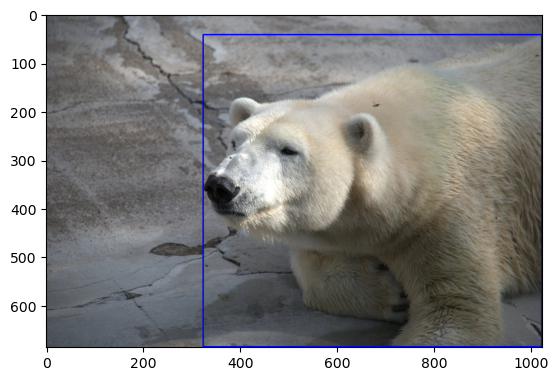

In [37]:
def show_img_bbox(img, coords, show_img=True):
    x, y, w, z = coords[0], coords[1], coords[2], coords[3]
    img = cv2.rectangle(img, (int(x), int(y)), (int(w), int(z)), (255,0,0) , 2)
    if not show_img:
        return img
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))    


img = cv2.imread('./datasets/train/images/23165e01ebdea3c4.jpg')
show_img_bbox(img, [x, y, w, z])

## Yolo V8 Model

Using the Yolo V8 model to detect bear images.\
Using the small version, for detection.\

In [38]:
model = YOLO("yolov8s.pt")
model.info()

YOLOv8s summary: 225 layers, 11166560 parameters, 0 gradients, 28.8 GFLOPs


(225, 11166560, 0, 28.816844800000002)

### Function to display the results of the model prediction

In [39]:
def analyse_results(img, result):
    boxs = result.boxes
    for box in boxs:
        obj = result.names[box.cls[0].item()]
        coords = box.xyxy[0].tolist()
        prob = box.conf[0].item()

        print("Object type:", obj)
        print("Coordinates:", coords)
        print("Probability:", prob)

        img = show_img_bbox(img, coords, False)
    
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))    

### Same example as before, without training 



0: 448x640 1 bear, 165.4ms
Speed: 6.4ms preprocess, 165.4ms inference, 6.4ms postprocess per image at shape (1, 3, 448, 640)
Object type: bear
Coordinates: [323.29986572265625, 52.82099533081055, 1023.5520629882812, 682.2109375]
Probability: 0.9469296336174011


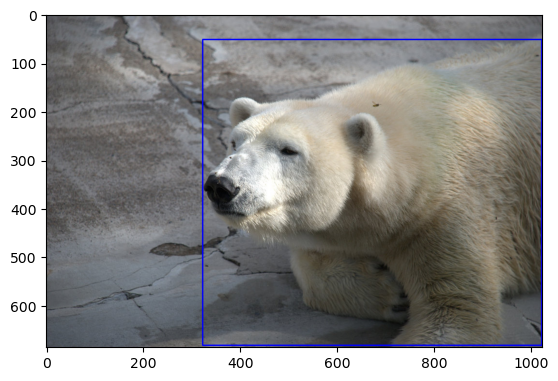

In [40]:
img = cv2.imread('./datasets/train/images/23165e01ebdea3c4.jpg')
results = model.predict(img)
analyse_results(img,results[0])

### Testing model on diferent images of bears


0: 448x640 2 bears, 182.5ms
Speed: 2.0ms preprocess, 182.5ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)
Object type: bear
Coordinates: [97.849853515625, 91.5511703491211, 619.7088012695312, 671.3401489257812]
Probability: 0.8532397747039795
Object type: bear
Coordinates: [509.943359375, 37.2568359375, 1022.015625, 677.2584228515625]
Probability: 0.834861159324646


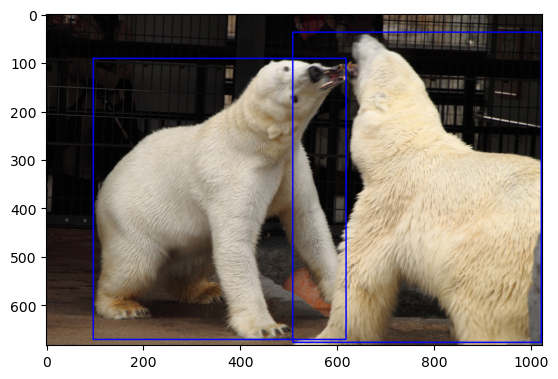

In [41]:
img = cv2.imread('./datasets/train/images/d9d0cc4eba730a94.jpg')
results = model.predict(img)
analyse_results(img,results[0])

0: 480x640 1 bear, 191.5ms
Speed: 15.9ms preprocess, 191.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)
Object type: bear
Coordinates: [316.29510498046875, 236.0896453857422, 617.97216796875, 442.2129821777344]
Probability: 0.940913200378418


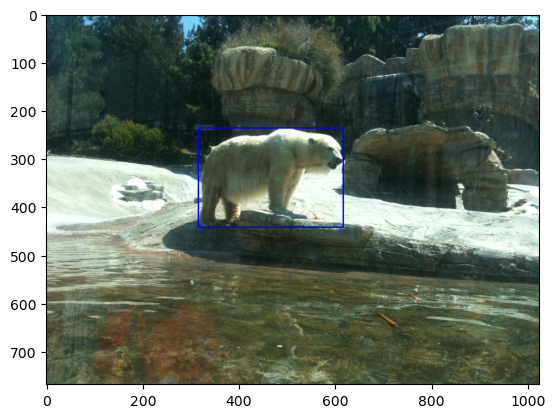

In [42]:
img = cv2.imread('./datasets/train/images/4038c53d8b6779b8.jpg')
results = model.predict(img)
analyse_results(img,results[0])

### Error Example

0: 480x640 1 bear, 190.3ms
Speed: 0.0ms preprocess, 190.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)
Object type: bear
Coordinates: [26.084569931030273, 47.21088790893555, 1021.4486083984375, 766.4588623046875]
Probability: 0.7940037250518799


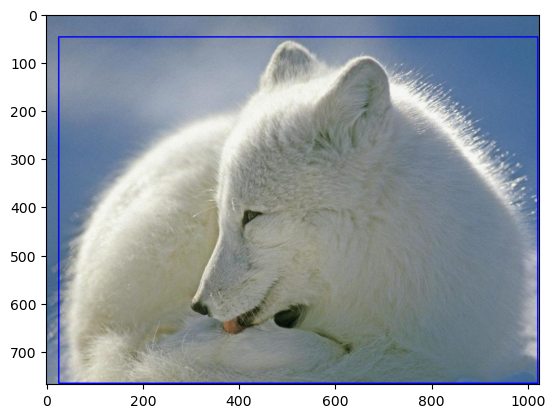

In [43]:
img = cv2.imread('./datasets/train/images/9f25b529c9a79a76.jpg')
results = model.predict(img)
analyse_results(img,results[0])

## Results

As seen previously, the YoloV8 model already has a very good accuracy when detecting images of Bears, making it unnecessary to retrain.
Because the model was trained in the [COCO](https://github.com/ultralytics/ultralytics/blob/main/ultralytics/cfg/datasets/coco.yaml) dataset, and it doesn't have pictures of wolves, the model detected a Bear incorrectly in the last image. 